# Introduction to sklearn library
<p><img alt="python logo" height="45px" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg" align="left" hspace="10px" vspace="0px"></p>

One of the most popular python libraries for machine learning is sci-kit learn (also known as sklearn) library.
sklearn library has implemented almost any machine learning algorithm you need.
One of these algorithm is kNN which we just used. Let's how we can use sklearn to do kNN analysis.

## Split data into train and test sets

In order to test our machine leanring algorithm, we seperate a small portion of our dataset, which is called "Test Set". During training, our machine learning algorithm will not see the labels of the Test Set. If our trainning goes well, we expect a good accuracy in predicting the labels of test set. 

![click here](https://drive.google.com/uc?id=1H_Jj9spRECJ5UFKWQ5VA4o_7m6mAW1eO)

It is important that our test set is generated randomly. sklearn library has a method `model_selection.train_test_split` that will split the dataset into train and test. Use `?` to find how you can use this function


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np 
x = np.array([1.4, -10, 21.2, 14, -0.2, 12, 13])
y = np.array([1, 0, 0, 0, 1, 0, 1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print("x_train=", x_train)
print("y_train=", y_train)

x_train= [ -0.2  14.  -10.   12.   21.2   1.4]
y_train= [1 0 0 0 0 1]


## Scaling the input data

Let's look at an example from the previous lecture on predicting cancer using three features: \
`"worst concave points", "worst perimeter", "mean concave points"`. \
Lets say we have two points $p_1$ and $p_2$ 

$$p_1 = [0.2, 100, 0.13], ~~ p_2 = [0.1, 110, 0.15]$$

$$dist(p_1, p_2) = \sqrt{(0.2-0.1)^2 + (100-110)^2 + (0.13-0.15)^2} \approx 10.00052$$

Now lets's change the first component of $p_1$ and make it 5 times larger\
$$p_3 = [1, 100, 0.13], dist(p_2, p_3) \approx 10.0404$$

The distance barely moved, despite of the big change. Let's now change the second component only by 1%. \
$$p_4 = [0.2, 101, 0.13], dist(p_2, p_4) \approx 11.00047$$

Big change. This is really bad, when you want to do data analysis. To fix this we need to scale the data.

### min-max scaling
can you explain what happens in the next cell?

In [ ]:
# min-max scaling
import numpy as np
x_scaled = (x - x.min())/(x.max() - x.min())
x_scaled

array([0.36538462, 0.        , 1.        , 0.76923077, 0.31410256,
       0.70512821, 0.73717949])

In [ ]:
# compute the min and max of x_scaled? What can you say about min-max scaling
x_scaled_min = x_scaled.min()
x_scaled_max = x_scaled.max()

### mean-std scaling
can you explain what happens in the next cell?

In [ ]:
# mean-std scaling
x_scaled = (x - x.mean())/x.std()
x_scaled

array([-0.60162865, -1.75571437,  1.40283603,  0.67393978, -0.76360559,
        0.4714686 ,  0.57270419])

In [ ]:
# compute the mean and standard deviation of x_scaled? What can you say about mean-std scaling
x_scaled_mean = x_scaled.mean()
x_scaled_std = x_scaled.std()

## Scaling using sklearn library
When the input data has several columns, it is much easier to use sklearn library for scaling:
Here is how we can scale the data using min-max scalar in the sklearn library.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = x.reshape(-1, 1)
scaler.fit(x)
x_scaled = scaler.transform(x)
print(x_scaled)

[[0.36538462]
 [0.        ]
 [1.        ]
 [0.76923077]
 [0.31410256]
 [0.70512821]
 [0.73717949]]


Can you find what is the class for mead-std scalar? Find this and scale the data
Compare your answers with those found above.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = x.reshape(-1, 1)
scaler.fit(x)
x_scaled = scaler.transform(x)
print(x_scaled)

[[-0.60162865]
 [-1.75571437]
 [ 1.40283603]
 [ 0.67393978]
 [-0.76360559]
 [ 0.4714686 ]
 [ 0.57270419]]


## Cancer prediction using kNN analysis with sklearn library
Here is the order of things to do
1.   Import data, clean them if necessary
2.   Split to train and test sets
3.   Apply a scalar on the train data.
4.   from sklearn library, call kNN method
5.   fit kNN with training data
6.   see the accuracy of prediction on test datasets.



In [ ]:
# This block is imported from the previous lecture. ML_intro.ipynb

import pandas as pd
from sklearn.datasets import load_breast_cancer

# preprocessing, please do not change this part
cancer = load_breast_cancer()
columns = np.append(cancer.feature_names,['target'])
index = pd.RangeIndex(start=0, stop=len(cancer.data), step=1)
data = np.append(cancer.data, cancer.target[:,None], axis=1)
cancer_df = pd.DataFrame(data=data, index=index, columns=columns)

top_features = ["worst concave points", "worst perimeter", "mean concave points"]
X = cancer_df[top_features].to_numpy()
y = cancer_df["target"].to_numpy()

In [ ]:
X

array([[2.654e-01, 1.846e+02, 1.471e-01],
       [1.860e-01, 1.588e+02, 7.017e-02],
       [2.430e-01, 1.525e+02, 1.279e-01],
       ...,
       [1.418e-01, 1.267e+02, 5.302e-02],
       [2.650e-01, 1.846e+02, 1.520e-01],
       [0.000e+00, 5.916e+01, 0.000e+00]])

In [ ]:
# Split to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # we can random_state 

# print the size of X_train and X_test. confirm they add to the size of X.
X_train_size = X_train.shape[0]
X_test_size = X_test.shape[0]
X_size = X.shape[0]

assert X_train_size+X_test_size == X_size

In [ ]:
# Use MinMaxScaler and scale the X_train and X_test. 
# Remember, we fit data using X_train.

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:5,:]


array([[0.60996564, 0.35703969, 0.45695825],
       [0.84604811, 0.46461477, 0.68439364],
       [0.59140893, 0.52238657, 0.51838966],
       [0.26202749, 0.18785796, 0.15402584],
       [0.48006873, 0.29378953, 0.35109344]])

In [ ]:
# import kNN from sklearn and train data
from sklearn.neighbors import KNeighborsClassifier
k = 3
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X_train_scaled, y_train)
y_pred = my_knn.predict(X_test_scaled)

print(y_pred)
print(y_test)

[1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.]


## Accuracy
In order to check accuracy, we have to compare `y_pred` and `y_test` elementwise, and see how many of their inputs agree with each other.

In [ ]:
# set acc = 0
acc = 0

# write a for loop that increment acc, if an element of y_pred is equal to the same element in y_test
# remember you need change y_test to a numpy array.
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    acc += 1
acc /= len(y_pred)
print("accuracy = %f " %acc)

accuracy = 0.447368 


In [ ]:
(y_test == y_pred).sum()/len(y_pred)

0.4473684210526316

Sklearn can also calculate accuracy for us

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.4473684210526316

## Fine-tuning hyper parameters
In our KNN function, we arbitrarily choose k=3. But we don't know if this is the best value. k here is called a hyper parameter. Hyper parameter tuning is an importnat part of any machine learning procedure.

In order to identify the possible value of k, for all values of k from 1 to 100, we run the model and store accuracy.

In [ ]:
# write a list of all integers from 1 to 100
k_list = list(range(1, 100))

# setup an empty list for accuracy.
acc_list = []

# in a for loopo, we train a KNN width different value of k. calculate the accuracy
# and store in acc_list.

for k in k_list:
  my_knn = KNeighborsClassifier(n_neighbors=k)
  my_knn.fit(X_train_scaled, y_train)
  y_pred = my_knn.predict(X_test_scaled)
  acc = accuracy_score(y_pred, y_test)
  acc_list.append(acc)

Text(0, 0.5, 'accuracy')

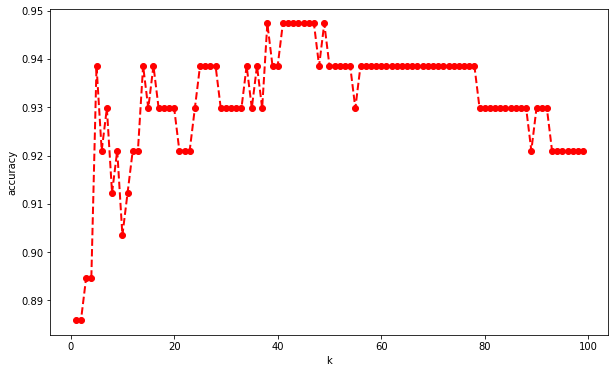

In [ ]:
# use matplotlib library to plot acc as a function k
import matplotlib.pyplot as plt
plt.figure(figsize= (10,6))
plt.plot(k_list, acc_list, 'ro--', linewidth=2)
plt.xlabel("k")
plt.ylabel("accuracy")

## Decision Tree and Random Forest

We also learned how decision tree and random forest work. We can use Sklearn implementation of these algorithms. DecisionTreeClassifier has about 15 hyperparameters. but for now we use all the default values.
 Use `fit` and `predict` methods for DecisionTreeClassifier class and calculate the accuracy of this method.

is this better or worse than kNN?


In [ ]:
# import linear classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.47368421052631576


Repeat for a Random Forest. Use 30 tree inside the forest. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.5087719298245614


## Effect of Scaling
Try training two models, one a kNN with k=10 and one a SGDClassifier, but this time do not scale the data. 
How does this affect accuracy? Which method is more senstitive?

In [ ]:

X = cancer_df.drop(columns="target").to_numpy()
y = cancer_df["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # we can random_state 


#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
models = [KNeighborsClassifier(n_neighbors=k), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10)]
model_names = ["knn", "decision tree", "random forest"]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, accuracy_score(y_pred, y_test))

knn 0.9210526315789473
decision tree 0.9473684210526315
random forest 0.9824561403508771
